In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import nltk
nltk.download('punkt')
import re

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\Ng Jing
[nltk_data]     En\AppData\Roaming\nltk_data...


[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Ng Jing
[nltk_data]     En\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ng Jing
[nltk_data]     En\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
data = pd.read_csv("Instagram data.csv", encoding = "latin1")

In [23]:
data

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [24]:
for column in data:
    print("coloumn name:", column, "- missing values", data[column].isnull().sum())
    print("----------------------------------------------------------------------")

coloumn name: Impressions - missing values 0
----------------------------------------------------------------------
coloumn name: From Home - missing values 0
----------------------------------------------------------------------
coloumn name: From Hashtags - missing values 0
----------------------------------------------------------------------
coloumn name: From Explore - missing values 0
----------------------------------------------------------------------
coloumn name: From Other - missing values 0
----------------------------------------------------------------------
coloumn name: Saves - missing values 0
----------------------------------------------------------------------
coloumn name: Comments - missing values 0
----------------------------------------------------------------------
coloumn name: Shares - missing values 0
----------------------------------------------------------------------
coloumn name: Likes - missing values 0
-----------------------------------------------

# Finding Correlation of Captions + Hashtags and Impressions

In [25]:
captionDF = data
captionDF['fullCaption'] = captionDF['Caption'] + ' ' + data['Hashtags']
captionDF['fullCaption'] = captionDF['fullCaption'].apply(lambda x: str(x).replace(u'\xa0', u' '))
captionDF['fullCaption'] = captionDF['fullCaption'].apply(lambda x: str(x).lower())
captionDF['fullCaption'][0]

def tokenize_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

# Stemming function
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

df = captionDF
# Apply tokenization, remove stopwords, and perform stemming or lemmatization
df['Tokenized_Text'] = df['fullCaption'].apply(tokenize_text)
df['Stemmed_Text'] = df['Tokenized_Text'].apply(stem_tokens)
df['tokenizedCaptions'] = df['Tokenized_Text'].apply(lemmatize_tokens)
captionDF = df

In [26]:
captionDF

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,fullCaption,Tokenized_Text,Stemmed_Text,tokenizedCaptions
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,here are some of the most important data visua...,"[important, data, visualizations, every, finan...","[import, data, visual, everi, financi, data, a...","[important, data, visualization, every, financ..."
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,here are some of the best data science project...,"[best, data, science, project, ideas, healthca...","[best, data, scienc, project, idea, healthcar,...","[best, data, science, project, idea, healthcar..."
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,learn how to train a machine learning model an...,"[learn, train, machine, learning, model, givin...","[learn, train, machin, learn, model, give, inp...","[learn, train, machine, learning, model, givin..."
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,heres how you can write a python program to d...,"[heres, write, python, program, detect, whethe...","[here, write, python, program, detect, whether...","[here, write, python, program, detect, whether..."
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,plotting annotations while visualizing your da...,"[plotting, annotations, visualizing, data, con...","[plot, annot, visual, data, consid, good, prac...","[plotting, annotation, visualizing, data, cons..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,here are some of the best data science certifi...,"[best, data, science, certifications, choose, ...","[best, data, scienc, certif, choos, datasci, d...","[best, data, science, certification, choose, d..."
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...,clustering is a machine learning technique use...,"[clustering, machine, learning, technique, use...","[cluster, machin, learn, techniqu, use, classi...","[clustering, machine, learning, technique, use..."
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...,clustering music genres is a task of grouping ...,"[clustering, music, genres, task, grouping, mu...","[cluster, music, genr, task, group, music, bas...","[clustering, music, genre, task, grouping, mus..."
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...,here are some of the best data science certifi...,"[best, data, science, certifications, choose, ...","[best, data, scienc, certif, choos, datasci, d...","[best, data, science, certification, choose, d..."


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

captionDF['combinedTokens'] = captionDF['tokenizedCaptions'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(captionDF['combinedTokens'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Compute correlation matrix between TF-IDF features and impressions
correlation_matrix = np.corrcoef(tfidf_df.values.T, captionDF['Impressions'])

# Get correlation coefficients for each word
word_correlations = correlation_matrix[:-1, -1]

# Create a DataFrame to display word correlations
word_correlation_df = pd.DataFrame({
    'Word': tfidf_df.columns,
    'Correlation_with_Impressions': word_correlations
})

# Sort DataFrame by correlation coefficient in descending order
word_correlation_df = word_correlation_df.sort_values(by='Correlation_with_Impressions', ascending=False)

print(word_correlation_df)

                Word  Correlation_with_Impressions
164        explained                      0.497124
433           solved                      0.496412
68     certification                      0.474184
40               bio                      0.430084
263             link                      0.430084
..               ...                           ...
38           bigdata                     -0.198880
95   computerscience                     -0.201502
82            coding                     -0.215960
468             tech                     -0.231970
470       technology                     -0.244174

[545 rows x 2 columns]


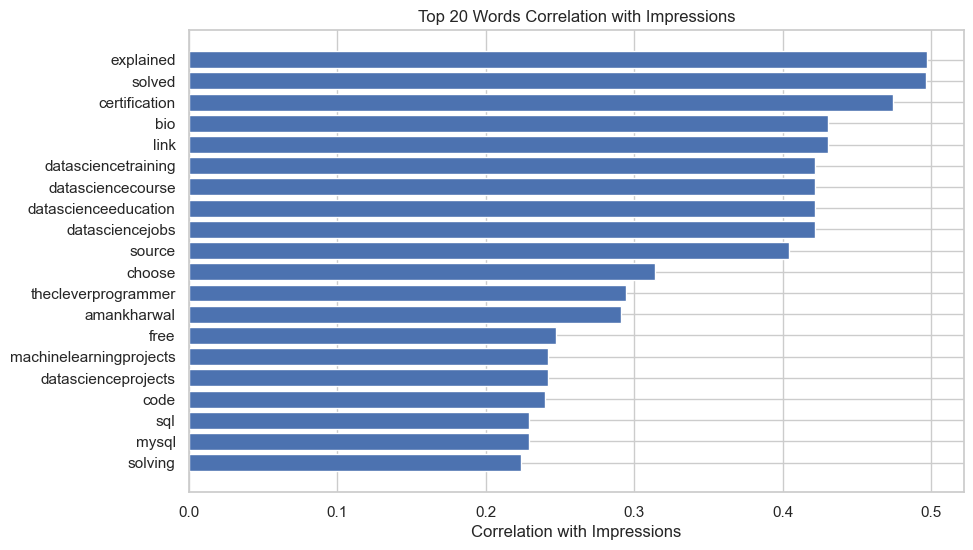

In [28]:
import matplotlib.pyplot as plt

# Set the number of top words to display
top_n = 20

# Get the top N words with the highest absolute correlation coefficients
top_words = word_correlation_df.iloc[:top_n, :]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words['Word'], top_words['Correlation_with_Impressions'])
plt.xlabel('Correlation with Impressions')
plt.title('Top {} Words Correlation with Impressions'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest correlation at the top
plt.show()

In [29]:
# Compute correlation matrix between TF-IDF features and impressions
correlation_matrix = np.corrcoef(tfidf_df.values.T, captionDF['Likes'])

# Get correlation coefficients for each word
likes_correlation = correlation_matrix[:-1, -1]

# Create a DataFrame to display word correlations
likes_correlation_df = pd.DataFrame({
    'Word': tfidf_df.columns,
    'Correlation_with_Likes': likes_correlation
})

# Sort DataFrame by correlation coefficient in descending order
likes_correlation_df = likes_correlation_df.sort_values(by='Correlation_with_Likes', ascending=False)

print(likes_correlation_df)

                    Word  Correlation_with_Likes
68         certification                0.457774
8            amankharwal                0.432245
477  thecleverprogrammer                0.419642
164            explained                0.414456
433               solved                0.405698
..                   ...                     ...
16             analytics               -0.227649
129    datavisualization               -0.235501
82                coding               -0.238200
468                 tech               -0.264592
470           technology               -0.286779

[545 rows x 2 columns]


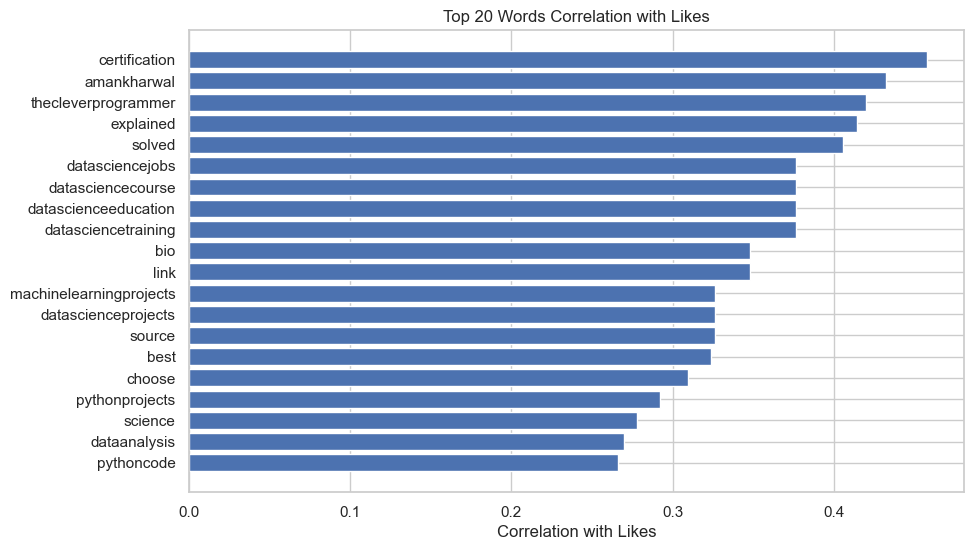

In [30]:
import matplotlib.pyplot as plt

# Set the number of top words to display
top_n = 20

# Get the top N words with the highest absolute correlation coefficients
top_words = likes_correlation_df.iloc[:top_n, :]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words['Word'], top_words['Correlation_with_Likes'])
plt.xlabel('Correlation with Likes')
plt.title('Top {} Words Correlation with Likes'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to have the highest correlation at the top
plt.show()

In [31]:
# Extract list of columns
data_cols = list(data.columns)
print('Dataset columns: {}'.format(data_cols))

Dataset columns: ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags', 'fullCaption', 'Tokenized_Text', 'Stemmed_Text', 'tokenizedCaptions', 'combinedTokens']


In [32]:
data_columns = pd.DataFrame(data, columns = data_cols)

In [33]:
n_samples = 20

def bootstrap_data(df, n_samples):
    bootstrap_samples = []
    for i in range(n_samples):
        bootstrap_sample = pd.DataFrame()
        for column in df.columns:
            sample = df[column].sample(n=len(df), replace=True, random_state=1000).reset_index(drop=True)
            bootstrap_sample[column] = sample
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

bootstrap_samples = bootstrap_data(data, n_samples)

for bootstrap_sample in bootstrap_samples:
    data = pd.concat([data, bootstrap_sample], ignore_index=True)

data


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,fullCaption,Tokenized_Text,Stemmed_Text,tokenizedCaptions,combinedTokens
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,here are some of the most important data visua...,"[important, data, visualizations, every, finan...","[import, data, visual, everi, financi, data, a...","[important, data, visualization, every, financ...",important data visualization every financial d...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,here are some of the best data science project...,"[best, data, science, project, ideas, healthca...","[best, data, scienc, project, idea, healthcar,...","[best, data, science, project, idea, healthcar...",best data science project idea healthcare want...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,learn how to train a machine learning model an...,"[learn, train, machine, learning, model, givin...","[learn, train, machin, learn, model, give, inp...","[learn, train, machine, learning, model, givin...",learn train machine learning model giving inpu...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,heres how you can write a python program to d...,"[heres, write, python, program, detect, whethe...","[here, write, python, program, detect, whether...","[here, write, python, program, detect, whether...",here write python program detect whether sente...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,plotting annotations while visualizing your da...,"[plotting, annotations, visualizing, data, con...","[plot, annot, visual, data, consid, good, prac...","[plotting, annotation, visualizing, data, cons...",plotting annotation visualizing data considere...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...,here are two best ways to count the number of ...,"[two, best, ways, count, number, letters, stri...","[two, best, way, count, number, letter, string...","[two, best, way, count, number, letter, string...",two best way count number letter string using ...
2495,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...,learn how to analyze a candlestick chart as a ...,"[learn, analyze, candlestick, chart, data, sci...","[learn, analyz, candlestick, chart, data, scie...","[learn, analyze, candlestick, chart, data, sci...",learn analyze candlestick chart data scientist...
2496,5055,2017,2351,298,108,101,7,11,159,17,6,"In Data Science, Time Series Analysis is a met...",#timeseries #time #statistics #datascience #bi...,"in data science, time series analysis is a met...","[data, science, time, series, analysis, method...","[data, scienc, time, seri, analysi, method, an...","[data, science, time, series, analysis, method...",data science time series analysis method analy...
2497,11068,2099,2986,5634,122,214,7,8,250,39,34,Here are some of the best data science project...,#data #datascience #dataanalysis #dataanalytic...,here are some of the best data science project...,"[best, data, science, project, ideas, based, s...","[best, data, scienc, project, idea, base, soci...","[best, data, science, project, idea, based, so...",best data science project idea based social me...


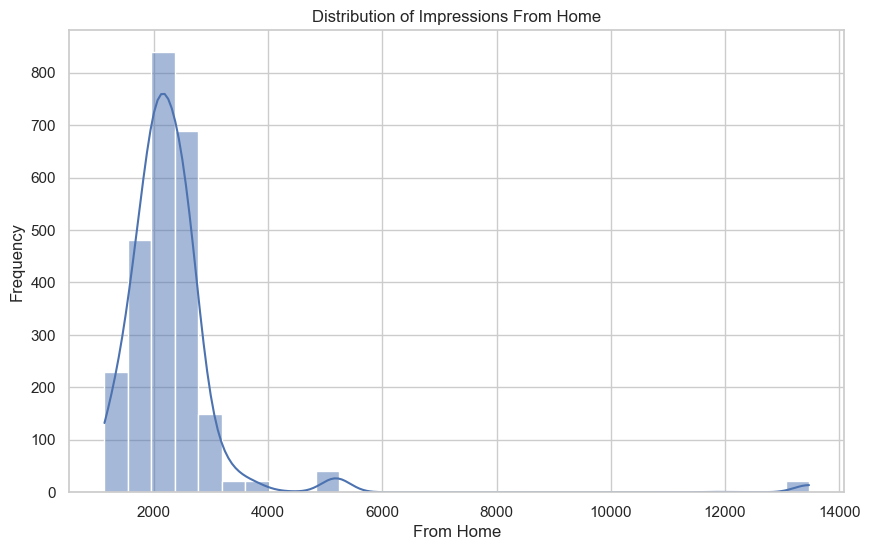

In [34]:
sb.set(style="whitegrid")

# Function to plot distribution for a given column
def plot_distribution(data, column_name, title):
    plt.figure(figsize=(10, 6))
    sb.histplot(data[column_name], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions for each column
plot_distribution(data, 'From Home', 'Distribution of Impressions From Home')

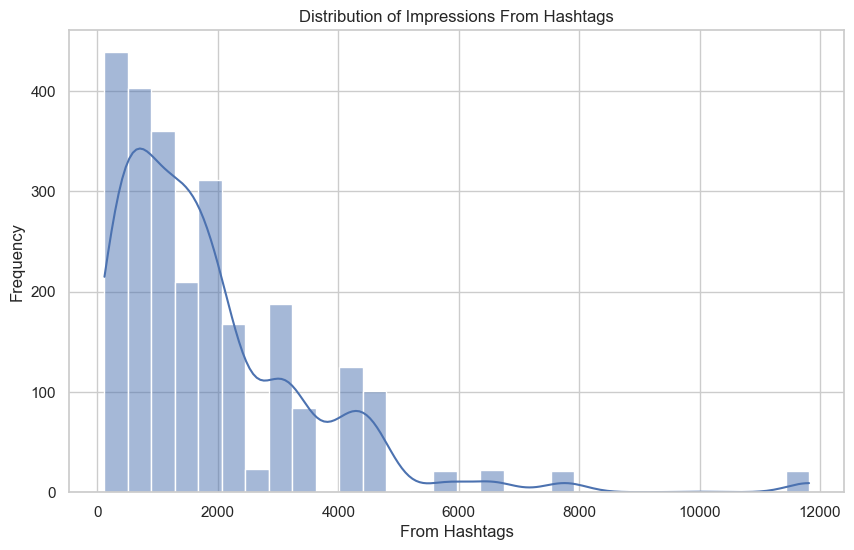

In [35]:
# Plotting distribution for "From Hashtags"
plot_distribution(data, 'From Hashtags', 'Distribution of Impressions From Hashtags')

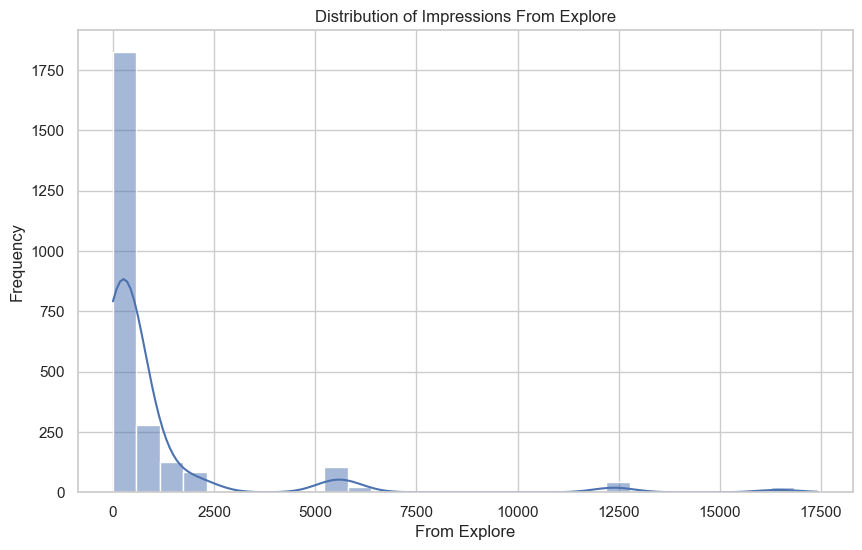

In [36]:
# Plotting distribution for "From Explore"
plot_distribution(data, 'From Explore', 'Distribution of Impressions From Explore')

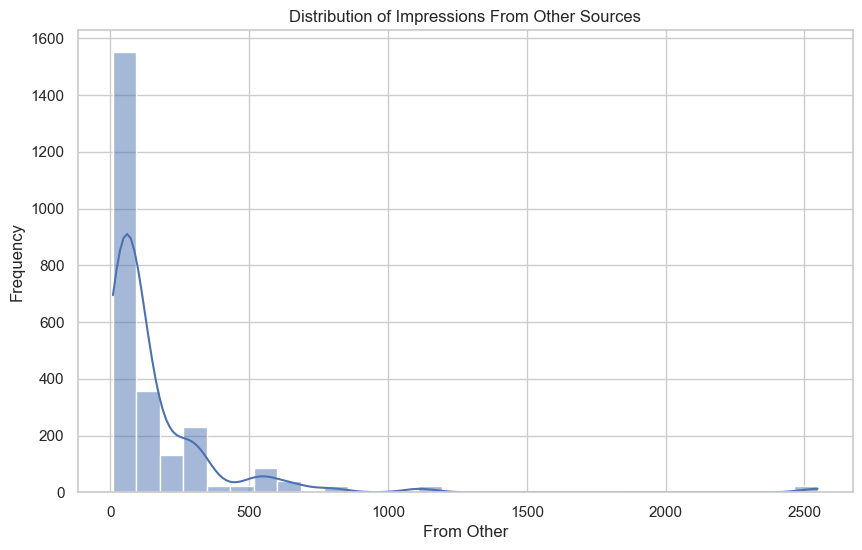

In [37]:
# Plotting distribution for "From Other"
plot_distribution(data, 'From Other', 'Distribution of Impressions From Other Sources')

In [38]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.4)
fig.show()

Analyzing Relationships between Different Features 

In [51]:
figure = px.scatter(data_frame=data, x="Impressions", y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [52]:
figure = px.scatter(data_frame = df, x="Impressions", y="Comments", size="Comments", trendline="ols", title = "Relationship Between Comments and Total Impressions")
figure.show()

In [54]:
figure = px.scatter(data_frame = data, x="Impressions", y="Saves", size="Saves", trendline="ols", title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [53]:
correlation = data.corr(numeric_only = True )
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Follows           0.937779
From Explore      0.861251
Likes             0.820936
Profile Visits    0.806473
From Home         0.777328
Saves             0.772022
From Other        0.696642
From Hashtags     0.559606
Shares            0.531511
Comments          0.011830
Name: Impressions, dtype: float64


Analyzing Conversion Rate 

In [55]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

37.525591753169785


In [57]:
figure = px.scatter(data_frame = data, x = "Profile Visits", y = "Follows", size = "Follows", trendline = "ols", title = "Relationship Between Profile Visits and Followers")
figure.show()

Instagram Reach Prediction Model: Linear Regression Model 

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Linear Regression Model to Predict Impressions using Likes 

Intercept of Regression 	: b =  [-2367.18301665]
Coefficients of Regression 	: a =  [[46.79332672]]

  Predictors  Coefficients
0      Likes     46.793327



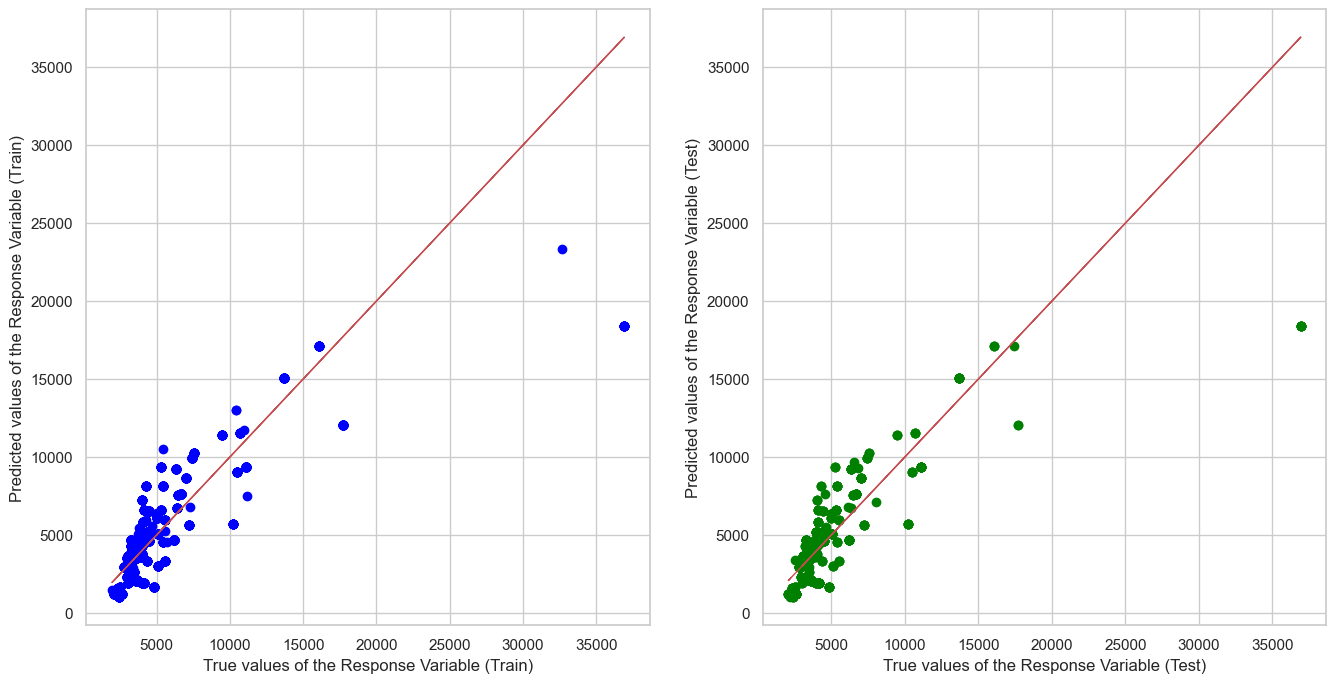

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.677546932960341
Mean Squared Error (MSE) 	: 5419045.58863822

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6610422588574218
Mean Squared Error (MSE) 	: 7226972.689998186



In [69]:
# Extract Response and Predictors
y = pd.DataFrame(data["Impressions"])
X = pd.DataFrame(data["Likes"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1000)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Linear Regression Model to Predict Impressions using Follows

Intercept of Regression 	: b =  [3174.46276539]
Coefficients of Regression 	: a =  [[136.91902094]]

  Predictors  Coefficients
0    Follows    136.919021



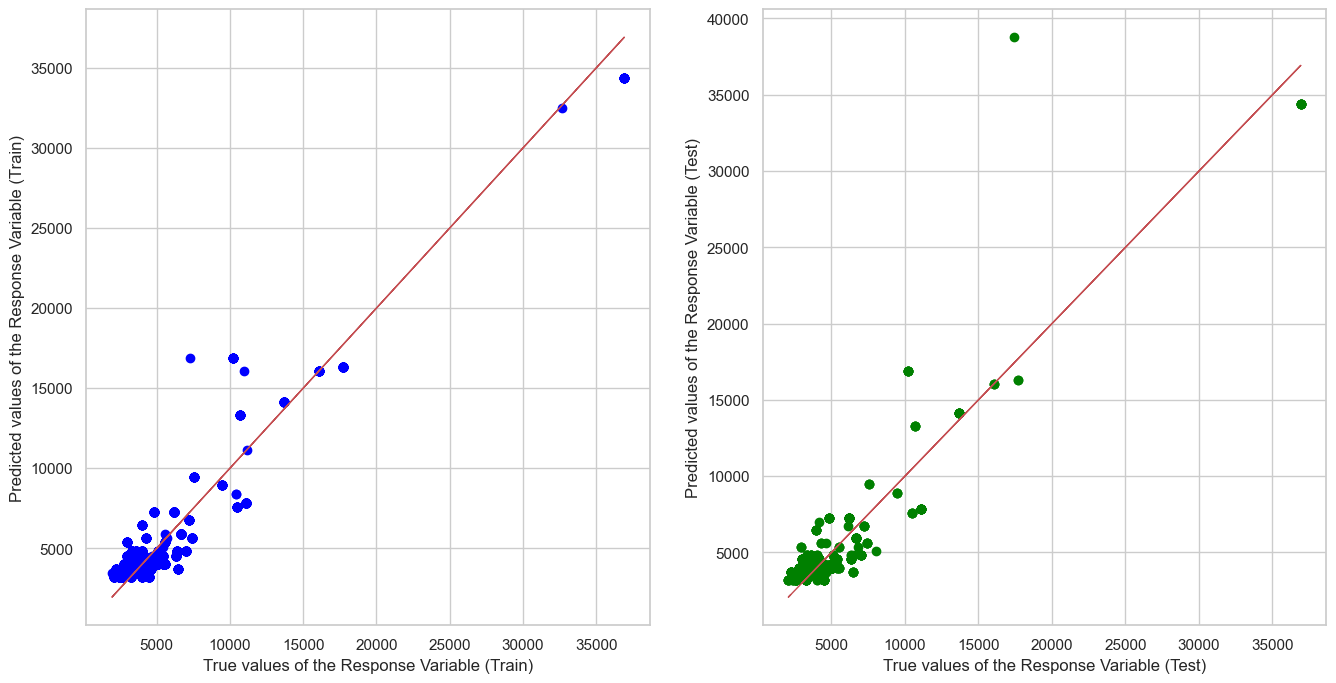

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8865496417671037
Mean Squared Error (MSE) 	: 1906611.3061216075

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8556640761998928
Mean Squared Error (MSE) 	: 3077409.5200565513



In [72]:
# Extract Response and Predictors
y = pd.DataFrame(data["Impressions"])
X = pd.DataFrame(data["Follows"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1000)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()